Informasi Ringkas tentang Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes
None

Statistik Deskriptif:
       YearsExperience        Age         Salary
count        30.000000  30.000000      30.000000
mean          5.313333  27.216667   76003.000000
std           2.837888   5.161267   27414.429785
min           1.100000  21.000000   37731.000000
25%           3.200000  23.300000   56720.750000
50%           4.700000  25.000000   65237.000000
75%           7.700000  30.750000  100544.750000
max          10.500000  38.000000  122391.000000

Hasil Pengolahan Data:
Pengalaman kerja 1.1 dengan umur 21.0 mendapatkan gaji 39343.0
Pengalaman kerja 1.3 d

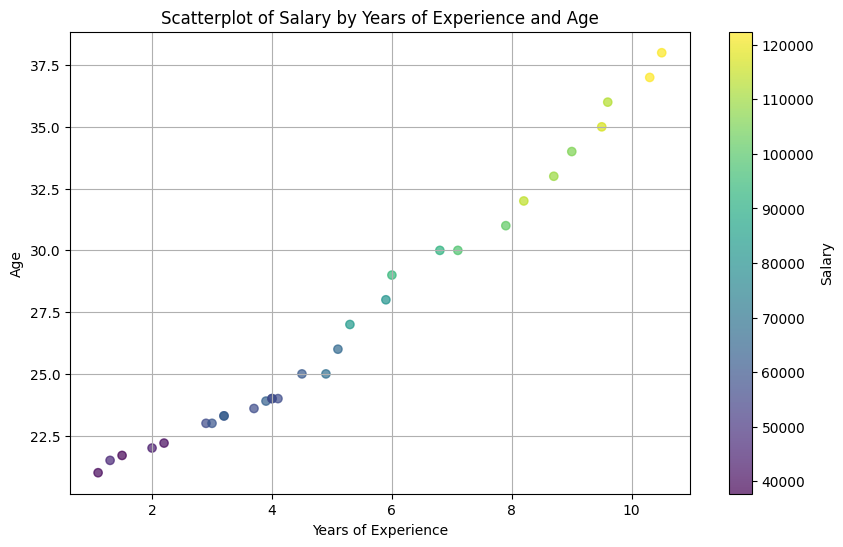

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce



# Baca dataset dari Kaggle
data = pd.read_csv('/content/Salary_Data.csv')  # /content/Salary_Data.csv.csvSesuaikan dengan lokasi file dataset Anda


# Eksplorasi data
print("Informasi Ringkas tentang Dataset:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())


# Menghitung gaji berdasarkan umur
def hitung_gaji(umur):
    return umur


# Membuat kolom baru 'Gaji' berdasarkan umur dengan higher-order function
data['Gaji'] = data['Age'].apply(hitung_gaji)


# Filter kolom yang diperlukan
filtered_data = data[['Age', 'Salary', 'YearsExperience']]


# Mendefinisikan fungsi lambda untuk menggabungkan kolom 'Age', 'YearsExperience', dan 'Salary' dalam satu string
gabung_data = lambda age, exp, salary: f"Pengalaman kerja {exp} dengan umur {age} mendapatkan gaji {salary}"


# Menggunakan reduce untuk menggabungkan nilai-nilai dari setiap baris
hasil_reduce = reduce(lambda a, b: f"{a}\n{b}", filtered_data.apply(lambda row: gabung_data(row['Age'], row['YearsExperience'], row['Salary']), axis=1))


# Cetak hasil reduce
print("\nHasil Pengolahan Data:")
print(hasil_reduce)


# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(data['YearsExperience'], data['Age'], c=data['Salary'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Age')
plt.title('Scatterplot of Salary by Years of Experience and Age')
plt.grid(True)
plt.show()
